In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv("train.csv")

In [53]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [55]:
df.shape

(404290, 6)

In [56]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

<AxesSubplot:>

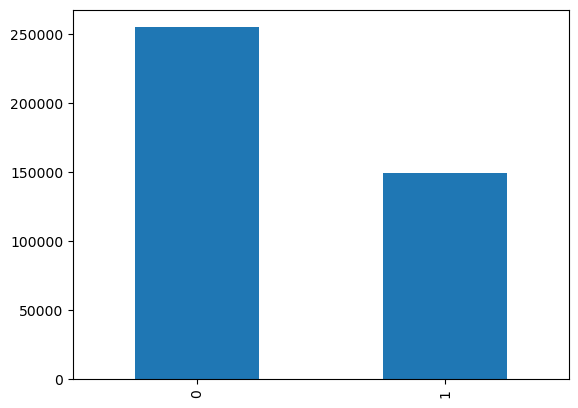

In [57]:
df['is_duplicate'].value_counts().plot(kind="bar")

In [8]:
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print("Number of unique questions", np.unique(qid).shape[0])
x = qid.value_counts()>1
print("Number of questions getting repeated", x[x].shape[0])

Number of unique questions 537933
Number of questions getting repeated 111780


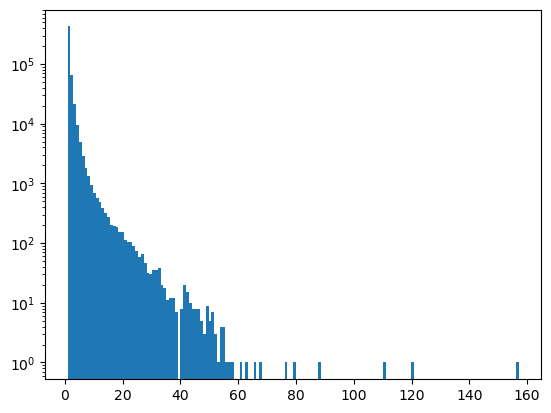

In [9]:
plt.hist(qid.value_counts().values, bins=160)
plt.yscale('log')
plt.show()

In [58]:
df = df.sample(30000)

In [59]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [60]:
df.duplicated().sum()

0

In [61]:
df.dropna(inplace=True)

# bow

In [14]:
que_df = df[['question1', 'question2']]

In [15]:
y = df['is_duplicate']

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=3000)
questions = list(que_df['question1']) + list(que_df['question2'])

In [17]:
q1_array, q2_array = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [18]:
temp_df1 = pd.DataFrame(q1_array, index=que_df.index)
temp_df2 = pd.DataFrame(q2_array, index=que_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(29999, 6000)

In [19]:
temp_df['is_duplicate'] = df['is_duplicate']

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(temp_df.iloc[:,0:-1].values, temp_df.iloc[:,-1].values, test_size=0.2,random_state=1)


KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
accuracy_score(y_test, y_pred)

In [ ]:
import xgboost

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
accuracy_score(y_test, y_pred)

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Assuming x_train and x_test are your feature matrices, and y_train, y_test are the corresponding labels

# Create an instance of the XGBClassifier
xgb = XGBClassifier()

# Train the classifier on the training data
xgb.fit(x_train, y_train)

# Make predictions on the test set
y_pred = xgb.predict(x_test)

# Evaluate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


# using feature engineering

In [62]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
127983,127983,205924,152597,Did the Ancient Carthaginians discover the Ame...,Did the Ancient Africans discover the Americas?,0
75848,75848,129736,129737,What does President Obama think about the porn...,What do you think of President Obama?,0
331185,331185,458048,458049,How can I find out my Skype ID?,Can I give you my Skype and we will figure it ...,0
84083,84083,142213,142214,When did U.S. presidents start outsourcing the...,Who was the last US president to write his own...,0
125587,125587,202579,202580,Is it worth pursuing a graduate degree in engi...,Is it worth pursuing a graduate degree in engi...,0


In [63]:
df['q1_len'] = df['question1'].apply(len)
df['q2_len'] = df['question2'].apply(len)

In [64]:
df['q1_num_words'] = df['question1'].apply(lambda x: len(x.split(" ")))
df['q2_num_words'] = df['question2'].apply(lambda x: len(x.split(" ")))

In [65]:
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
127983,127983,205924,152597,Did the Ancient Carthaginians discover the Ame...,Did the Ancient Africans discover the Americas?,0,52,47,7,7
75848,75848,129736,129737,What does President Obama think about the porn...,What do you think of President Obama?,0,56,37,9,7


In [66]:
def common_words(row):
    w1 = set(map(lambda x: x.lower().strip(), row["question1"].split(" ")))
    w2 = set(map(lambda x: x.lower().strip(), row["question2"].split(" ")))
    return len(w1 & w2)

In [67]:
df["word_common"] = df.apply(common_words, axis=1)

In [68]:
df.head(3)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
127983,127983,205924,152597,Did the Ancient Carthaginians discover the Ame...,Did the Ancient Africans discover the Americas?,0,52,47,7,7,5
75848,75848,129736,129737,What does President Obama think about the porn...,What do you think of President Obama?,0,56,37,9,7,3
331185,331185,458048,458049,How can I find out my Skype ID?,Can I give you my Skype and we will figure it ...,0,31,50,8,12,4


In [69]:
def total_words(row):
    w1 = set(map(lambda x: x.lower().strip(), row["question1"].split(" ")))
    w2 = set(map(lambda x: x.lower().strip(), row["question2"].split(" ")))
    return len(w1)+len(w2)

In [70]:
df["word_total"] = df.apply(total_words, axis=1)

In [71]:
df.head(3)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
127983,127983,205924,152597,Did the Ancient Carthaginians discover the Ame...,Did the Ancient Africans discover the Americas?,0,52,47,7,7,5,12
75848,75848,129736,129737,What does President Obama think about the porn...,What do you think of President Obama?,0,56,37,9,7,3,16
331185,331185,458048,458049,How can I find out my Skype ID?,Can I give you my Skype and we will figure it ...,0,31,50,8,12,4,20


In [72]:
df['word_share'] = round(df['word_common']/df['word_total'],2)

In [73]:
df.head(1)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
127983,127983,205924,152597,Did the Ancient Carthaginians discover the Ame...,Did the Ancient Africans discover the Americas?,0,52,47,7,7,5,12,0.42


In [74]:
questions = list(df['question1']) + list(df['question2'])

In [75]:
questions[1]

'What does President Obama think about the porn industry?'

In [76]:
df.shape

(30000, 13)

In [77]:
f_df = df.drop(columns=['id', 'qid1', 'qid2', 'question1', 'question2'])

In [32]:
f_df.shape

(30000, 8)

In [78]:
f_df

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
127983,0,52,47,7,7,5,12,0.42
75848,0,56,37,9,7,3,16,0.19
331185,0,31,50,8,12,4,20,0.20
84083,0,73,56,11,11,2,22,0.09
125587,0,54,65,9,10,8,19,0.42
...,...,...,...,...,...,...,...,...
403913,0,100,86,20,17,5,34,0.15
379304,0,107,69,19,13,6,30,0.20
339470,1,40,63,9,14,5,23,0.22
84275,1,55,50,10,10,8,20,0.40


In [79]:
from sklearn.feature_extraction.text import CountVectorizer

In [84]:
cv = CountVectorizer(max_features=3000)

In [86]:
q1_array, q2_array = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [89]:
t1 = pd.DataFrame(q1_array, index=df.index)
t2 = pd.DataFrame(q2_array, index=df.index)
t_f = pd.concat([t1, t2], axis=1)

In [90]:
t_f

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
127983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75848,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
331185,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
84083,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
125587,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403913,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
379304,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
339470,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
84275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
fianl_df = pd.concat([f_df, t_f], axis=1)

In [92]:
fianl_df

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
127983,0,52,47,7,7,5,12,0.42,0,0,...,0,0,0,0,0,0,0,0,0,0
75848,0,56,37,9,7,3,16,0.19,0,0,...,1,0,0,0,0,0,0,0,0,0
331185,0,31,50,8,12,4,20,0.20,0,0,...,1,0,0,0,0,0,0,0,0,0
84083,0,73,56,11,11,2,22,0.09,0,0,...,0,0,0,0,0,0,0,0,0,0
125587,0,54,65,9,10,8,19,0.42,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403913,0,100,86,20,17,5,34,0.15,0,0,...,0,0,0,0,0,0,0,0,0,0
379304,0,107,69,19,13,6,30,0.20,0,0,...,0,0,0,0,0,0,0,0,0,0
339470,1,40,63,9,14,5,23,0.22,0,0,...,1,0,0,0,0,0,0,0,0,0
84275,1,55,50,10,10,8,20,0.40,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(fianl_df.iloc[:,1:].values,fianl_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)


0.7645

In [100]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7618333333333334

In [99]:
pip install xgboost

     ---------------------------------------- 99.8/99.8 MB 1.2 MB/s eta 0:00:00
     -------------------------------------- 14.9/14.9 MB 572.7 kB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.3
    Uninstalling numpy-1.26.3:
      Successfully uninstalled numpy-1.26.3
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.24.4 which is incompatible.


# bow_advanced_feature

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

In [102]:
df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
127983,127983,205924,152597,Did the Ancient Carthaginians discover the Ame...,Did the Ancient Africans discover the Americas?,0,52,47,7,7,5,12,0.42
75848,75848,129736,129737,What does President Obama think about the porn...,What do you think of President Obama?,0,56,37,9,7,3,16,0.19
331185,331185,458048,458049,How can I find out my Skype ID?,Can I give you my Skype and we will figure it ...,0,31,50,8,12,4,20,0.20
84083,84083,142213,142214,When did U.S. presidents start outsourcing the...,Who was the last US president to write his own...,0,73,56,11,11,2,22,0.09
125587,125587,202579,202580,Is it worth pursuing a graduate degree in engi...,Is it worth pursuing a graduate degree in engi...,0,54,65,9,10,8,19,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
403913,403913,537531,537532,How long does it take for the GRE general test...,Is GRE test score a way to get admitted to US ...,0,100,86,20,17,5,34,0.15
379304,379304,510814,510815,What is happiness? Why it is so difficult to b...,What is the point of having a partner if happi...,0,107,69,19,13,6,30,0.20
339470,339470,74743,98562,Can we love two person at the same time?,Do you think someone can be in love with two p...,1,40,63,9,14,5,23,0.22
84275,84275,142499,142500,How should I apply for a domicile certificate ...,How do I apply for domicile certificate in Tha...,1,55,50,10,10,8,20,0.40


In [104]:
new_df = df.sample(30000, random_state = 2)

In [105]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q

In [108]:
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

In [109]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
394104,394104,172618,526972,wold same sex marriage be banned reversed unde...,will president trump amend the constitution an...,1,67,70,10,11,3,21,0.14
25219,25219,19621,47020,why do some people ask questions on quora that...,why do people write questions on quora that co...,1,97,86,18,16,11,34,0.32
287358,287358,408124,408125,who is your ultimate crush,who is your ultimate indian crush,0,27,34,5,6,5,11,0.45
83584,83584,141468,98470,how often should we trim our pubic hair,what should i do with the pubic hair after tri...,0,40,52,8,10,2,18,0.11
287960,287960,408824,408825,how do i react when someone tells me they are sad,how should i react when someone tells me about...,1,49,64,10,11,7,21,0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
397899,397899,71499,531078,why is depression an illness,is depression an incurable illness,0,29,35,5,5,4,10,0.40
158695,158695,247880,247881,how do you define a successful quoran,how can we define success,0,38,26,7,5,2,12,0.17
342200,342200,46041,470135,on a train in india what does sl 1a 2a 3a ...,which one is the best 350 cc bike in india,0,59,43,14,10,2,24,0.08
236507,236507,116125,21507,how do you find purpose in life,what should one do to find purpose of one s life,1,32,49,7,10,4,17,0.24


In [110]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [111]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
394104,394104,172618,526972,wold same sex marriage be banned reversed unde...,will president trump amend the constitution an...,1,67,70,10,11,4,21,0.14
25219,25219,19621,47020,why do some people ask questions on quora that...,why do people write questions on quora that co...,1,97,86,18,16,12,34,0.32
287358,287358,408124,408125,who is your ultimate crush,who is your ultimate indian crush,0,27,34,5,6,5,11,0.45
83584,83584,141468,98470,how often should we trim our pubic hair,what should i do with the pubic hair after tri...,0,40,52,8,10,3,18,0.11
287960,287960,408824,408825,how do i react when someone tells me they are sad,how should i react when someone tells me about...,1,49,64,10,11,7,21,0.33


In [112]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [113]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
394104,394104,172618,526972,wold same sex marriage be banned reversed unde...,will president trump amend the constitution an...,1,67,70,10,11,4,22,0.14
25219,25219,19621,47020,why do some people ask questions on quora that...,why do people write questions on quora that co...,1,97,86,18,16,12,34,0.32
287358,287358,408124,408125,who is your ultimate crush,who is your ultimate indian crush,0,27,34,5,6,5,11,0.45
83584,83584,141468,98470,how often should we trim our pubic hair,what should i do with the pubic hair after tri...,0,40,52,8,10,3,18,0.11
287960,287960,408824,408825,how do i react when someone tells me they are sad,how should i react when someone tells me about...,1,49,64,10,11,7,22,0.33


In [114]:
# Advanced Features
from nltk.corpus import stopwords

def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [115]:
token_features = new_df.apply(fetch_token_features, axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [116]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
394104,394104,172618,526972,wold same sex marriage be banned reversed unde...,will president trump amend the constitution an...,1,67,70,10,11,...,22,0.14,0.428565,0.428565,0.249994,0.249994,0.363633,0.363633,0.0,0.0
25219,25219,19621,47020,why do some people ask questions on quora that...,why do people write questions on quora that co...,1,97,86,18,16,...,34,0.32,0.666659,0.599994,0.857131,0.749991,0.749995,0.666663,0.0,1.0
287358,287358,408124,408125,who is your ultimate crush,who is your ultimate indian crush,0,27,34,5,6,...,11,0.45,0.999950,0.666644,0.999967,0.999967,0.999980,0.833319,1.0,1.0
83584,83584,141468,98470,how often should we trim our pubic hair,what should i do with the pubic hair after tri...,0,40,52,8,10,...,18,0.11,0.666644,0.499988,0.249994,0.142855,0.374995,0.299997,0.0,0.0
287960,287960,408824,408825,how do i react when someone tells me they are sad,how should i react when someone tells me about...,1,49,64,10,11,...,22,0.33,0.749981,0.749981,0.571420,0.571420,0.636358,0.636358,0.0,1.0


In [118]:
pip install distance

     -------------------------------------- 180.3/180.3 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16257 sha256=e2d81698c344bc69ec2fd72afaa04eeebe610482d6b02657c19b28c7890e7e1b
  Stored in directory: c:\users\amolk\appdata\local\pip\cache\wheels\fb\b3\aa\04241cced6d1722b132273b1d6aafba317887ec004f48b853a
Successfully built distance
Note: you may need to restart the kernel to use updated packages.


In [119]:
import distance

def fetch_length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [122]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [121]:
pip install fuzzywuzzy

In [123]:
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [124]:
print(new_df.shape)
new_df.head()

(30000, 25)


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
394104,394104,172618,526972,wold same sex marriage be banned reversed unde...,will president trump amend the constitution an...,1,67,70,10,11,...,0.249994,0.249994,0.363633,0.363633,0.0,0.0,31,43,64,67
25219,25219,19621,47020,why do some people ask questions on quora that...,why do people write questions on quora that co...,1,97,86,18,16,...,0.857131,0.749991,0.749995,0.666663,0.0,1.0,74,74,72,86
287358,287358,408124,408125,who is your ultimate crush,who is your ultimate indian crush,0,27,34,5,6,...,0.999967,0.999967,0.999980,0.833319,1.0,1.0,88,81,88,100
83584,83584,141468,98470,how often should we trim our pubic hair,what should i do with the pubic hair after tri...,0,40,52,8,10,...,0.249994,0.142855,0.374995,0.299997,0.0,0.0,53,62,56,67
287960,287960,408824,408825,how do i react when someone tells me they are sad,how should i react when someone tells me about...,1,49,64,10,11,...,0.571420,0.571420,0.636358,0.636358,0.0,1.0,77,80,80,80


In [125]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
394104,wold same sex marriage be banned reversed unde...,will president trump amend the constitution an...
25219,why do some people ask questions on quora that...,why do people write questions on quora that co...
287358,who is your ultimate crush,who is your ultimate indian crush
83584,how often should we trim our pubic hair,what should i do with the pubic hair after tri...
287960,how do i react when someone tells me they are sad,how should i react when someone tells me about...


In [126]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 20)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
394104,1,67,70,10,11,4,22,0.14,0.428565,0.428565,0.249994,0.249994,0.363633,0.363633,0.0,0.0,31,43,64,67
25219,1,97,86,18,16,12,34,0.32,0.666659,0.599994,0.857131,0.749991,0.749995,0.666663,0.0,1.0,74,74,72,86
287358,0,27,34,5,6,5,11,0.45,0.999950,0.666644,0.999967,0.999967,0.999980,0.833319,1.0,1.0,88,81,88,100
83584,0,40,52,8,10,3,18,0.11,0.666644,0.499988,0.249994,0.142855,0.374995,0.299997,0.0,0.0,53,62,56,67
287960,1,49,64,10,11,7,22,0.33,0.749981,0.749981,0.571420,0.571420,0.636358,0.636358,0.0,1.0,77,80,80,80


In [127]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [132]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

MemoryError: Unable to allocate 687. MiB for an array with shape (3000, 30000) and data type int64

In [133]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7535

In [134]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1 = xgb.predict(X_test)
accuracy_score(y_test,y_pred1)

0.749

In [135]:
from sklearn.metrics import confusion_matrix

In [136]:
confusion_matrix(y_test,y_pred)

array([[2956,  821],
       [ 658, 1565]], dtype=int64)

In [138]:
confusion_matrix(y_test,y_pred1)

array([[2943,  834],
       [ 672, 1551]], dtype=int64)

In [139]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return len(w1 & w2)

In [140]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return (len(w1) + len(w2))